In [ ]:
# implemented by kiarash geraili
# with std number: 830400048
# course: soft computing
# instructed by Hadi veisi
# TA: Ali Rahimi

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import math
import pickle
import itertools, math
import time
import array
import csv
import codecs
import random
import os


!pip install deap
!pip install tsplib95

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tsplib95

from deap import base
from deap import creator
from deap import tools
from deap import algorithms


drive.mount('/content/gdrive')

#here i am reading bayg29 from google drive and all other data sets from uploaded files here

bayg29 = tsplib95.load('/content/gdrive/MyDrive/tsp/bayg29.tsp')
d2103, ali535,  ftv33 = tsplib95.load('/content/d2103.tsp'), tsplib95.load('/content/ali535.tsp'), tsplib95.load('/content/ftv33.atsp')
bayg29.edge_weights

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[[97,
  205,
  139,
  86,
  60,
  220,
  65,
  111,
  115,
  227,
  95,
  82,
  225,
  168,
  103,
  266,
  205,
  149,
  120,
  58,
  257,
  152,
  52,
  180,
  136,
  82,
  34,
  145],
 [129,
  103,
  71,
  105,
  258,
  154,
  112,
  65,
  204,
  150,
  87,
  176,
  137,
  142,
  204,
  148,
  148,
  49,
  41,
  211,
  226,
  116,
  197,
  89,
  153,
  124,
  74],
 [219,
  125,
  175,
  386,
  269,
  134,
  184,
  313,
  201,
  215,
  267,
  248,
  271,
  274,
  236,
  272,
  160,
  151,
  300,
  350,
  239,
  322,
  78,
  276,
  220,
  60],
 [167,
  182,
  180,
  162,
  208,
  39,
  102,
  227,
  60,
  86,
  34,
  96,
  129,
  69,
  58,
  60,
  120,
  119,
  192,
  114,
  110,
  192,
  136,
  173,
  173],
 [51,
  296,
  150,
  42,
  131,
  268,
  88,
  131,
  245,
  201,
  175,
  275,
  218,
  202,
  119,
  50,
  281,
  238,
  131,
  244,
  51,
  166,
  95,
  69],
 [279,
  114,
  56,
  150,
  278,
  46,
  133,
  266,
  214,
  162,
  302,
  242,
  203,
  146,
  67,
  300,
  205,
  1

In [ ]:
#here we preprocessed asymmeric matrix for last section of evolutionary algorithm

f_weights = ftv33.edge_weights

weights = [item for sublist in f_weights for item in sublist]

ftv33_weights = [weights[i*34:(i+1)*34] for i in range(34)]

ftv33_weights

[[100000000,
  26,
  82,
  65,
  100,
  147,
  134,
  69,
  117,
  42,
  89,
  125,
  38,
  13,
  38,
  31,
  22,
  103,
  143,
  94,
  104,
  123,
  98,
  58,
  38,
  30,
  67,
  120,
  149,
  100,
  93,
  162,
  62,
  66],
 [66,
  100000000,
  56,
  39,
  109,
  156,
  140,
  135,
  183,
  108,
  155,
  190,
  104,
  79,
  104,
  97,
  88,
  130,
  176,
  121,
  131,
  150,
  125,
  85,
  65,
  57,
  94,
  147,
  160,
  80,
  67,
  189,
  128,
  40],
 [43,
  57,
  100000000,
  16,
  53,
  100,
  84,
  107,
  155,
  85,
  132,
  168,
  81,
  56,
  81,
  74,
  65,
  146,
  186,
  137,
  147,
  166,
  141,
  101,
  81,
  73,
  110,
  163,
  164,
  102,
  71,
  205,
  105,
  62],
 [27,
  41,
  62,
  100000000,
  97,
  144,
  131,
  96,
  144,
  69,
  116,
  152,
  65,
  40,
  65,
  58,
  49,
  130,
  170,
  121,
  131,
  150,
  125,
  85,
  65,
  57,
  94,
  147,
  166,
  86,
  73,
  189,
  89,
  46],
 [109,
  135,
  161,
  174,
  100000000,
  47,
  34,
  54,
  102,
  67,
  114,
  175,
 

In [ ]:
#defining diiferent distance function for different datasets

def matrix_dist(a, b, weights):

  i = min(a, b)
  j = max(a, b)

  return weights[i][j-i-1]

def euc_dist(a, b, problem):

  i = problem.node_coords[a+1]
  j = problem.node_coords[b+1]

  r = math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)

  return r

def ftv_dist(a, b, weights):
  return weights[a][b]

euc_dist(3,0, d2103)

1167.179583440355

In [ ]:
bayg29_weights = bayg29.edge_weights
matrix_dist(4, 3, bayg29_weights)

167

## **Evolutionary Algorithms**

In [ ]:
city, iter,  best_distance= list(range(29)), 0, math.inf

tic = time.time()

for permutation in itertools.permutations(city):

  sum = 0

  for i in range(29):

    sum += matrix_dist(permutation[i], permutation[(i+1)%29], bayg29_weights)

  if sum <= best_distance:
    best_distance = sum
    best_path = permutation

  if iter % 10000 == 0:
    print()
    print("Best Path is: " + ", ".join([str(_) for _ in best_path]))
    print('Total Distance for Best Path is equal to: ' + str(best_distance))

  if iter == 100000:

    toc = time.time()

    print()
    print('Total time for direct solution in 100,000 iterations is equal to: ' + str(round(toc-tic,2)))

    break

  iter+=1


Best Path is: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28
Total Distance for Best Path is equal to: 4625

Best Path is: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 22, 26, 23, 28, 25, 27
Total Distance for Best Path is equal to: 4000

Best Path is: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 26, 22, 24, 21, 28, 25, 27
Total Distance for Best Path is equal to: 3943

Best Path is: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 28, 21, 24, 22, 26, 23, 27
Total Distance for Best Path is equal to: 3873

Best Path is: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 28, 21, 24, 22, 26, 23, 27
Total Distance for Best Path is equal to: 3873

Best Path is: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 28, 21, 24, 22, 26, 23, 27
Total Distance for Best Path is equal to: 387

In [ ]:
def fitness(chromosom, weight, dist):

  max_size = len(chromosom)
  total  = 0

  for i in range(max_size):

    total += dist(chromosom[i], chromosom[(i+1) % max_size], weight)

  return total

In [ ]:
import random
from random import randrange

def insertion_mutation(chromosom, mutation_p):

  size = len(chromosom)
  p = random.uniform(0, 1)

  if  p < mutation_p:

    while(True):

      a, b = randrange(size), randrange(size)

      i, j = min(a,b), max(a,b)

      if i != j:

        chromosom.insert(i+1, chromosom[j])
        chromosom.pop(j+1)

        break

  return chromosom

In [ ]:
def recombination(parent1, parent2):

  child1, child2 = [-1] * len(parent1), [-1] * len(parent1)

  r_index = list(range(len(parent1)))

  p1 = parent1.copy()
  p2 = parent2.copy()

  while -1 in child1:

    i = r_index[0]
    idx_list = [i]
    i = parent1.index(parent2[i])

    while i != idx_list[0]:

      idx_list.append(i)
      i = parent1.index(parent2[i])

    for idx in idx_list:

      child1[idx], child2[idx] = p1[idx], p2[idx]

    temp = p1.copy()

    p1 = p2.copy()
    p2 = temp

    r_index = [_ for _ in r_index if _ not in idx_list]

  return child1, child2

In [ ]:
def evolutionary_algorithm(M, p_mutation, init_population_size,  p_replacement, n_tourn, p_comb, max_gen, len_ch, dist):

  population = [random.sample(list(range(len_ch)), len_ch) for _ in range(init_population_size)]
  best = []
  avg = []
  worst = []

  for i in range(max_gen):
    population_fitness = [fitness(c, M, dist) for c in population]
    best_res = population_fitness.index(min(population_fitness))
    best.append(min(population_fitness))
    print(type(sum(population_fitness)))
    print(sum(population_fitness))

    avg.append(sum(population_fitness)/len(population_fitness))
    worst.append(max(population_fitness))
    #print(population_fitness)

    next_gen = []
    p = random.uniform(0, 1)
    while p < p_comb:
      tournament_members_idx = random.sample(range(init_population_size), n_tourn)
      parent1 = population[population_fitness.index(min([population_fitness[i] for i in tournament_members_idx]))]
      tournament_members_idx = random.sample(range(init_population_size), n_tourn)
      parent2 = population[population_fitness.index(min([population_fitness[i] for i in tournament_members_idx]))]
      child1, child2 = recombination(parent1, parent2)
      child1, child2 = insertion_mutation(child1, p_mutation), insertion_mutation(child2, p_mutation)
      next_gen.append(child1)
      next_gen.append(child2)
      p = random.uniform(0, 1)
    random_children = random.sample(next_gen, min(len(next_gen),int(init_population_size*p_replacement)))
    for child in random_children:
      rand_idx = random.randrange(init_population_size)
      if rand_idx != best_res:
        population[rand_idx] = child
    #print(population)

  population_fitness = [fitness(c, M, dist) for c in population]
  best.append(min(population_fitness))
  avg.append(sum(population_fitness)/len(population_fitness))
  worst.append(max(population_fitness))

  return best, avg, worst

In [ ]:
from matplotlib import pyplot

def plotting(b, a, w):

  print("Best Answer is: " + str(min(b)))

  pyplot.plot(range(len(b)), b, label = "Best")
  pyplot.plot(range(len(a)), a, label = "Average")
  pyplot.plot(range(len(w)), w, label = "Worst")

  pyplot.legend()
  pyplot.show()

In [ ]:
#ali535
plotting(*evolutionary_algorithm(ali535, 0.02, 500,  0.4, 10, 0.9, 500, 535, euc_dist))

TypeError: ignored

Best Answer is: 2967030.829198765


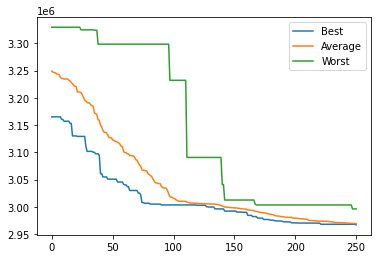

In [ ]:
#d2103
plotting(*evolutionary_algorithm(d2103, 0.02, 250,  0.4, 10, 0.9, 250, 2103, euc_dist))

Best Answer is: 1766


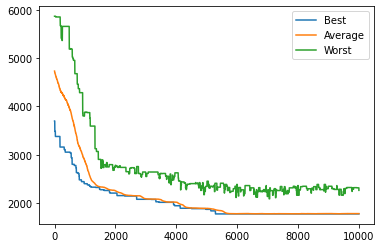

In [ ]:
#bayg29 default model based on question
plotting(*evolutionary_algorithm(bayg29_weights, 0.02, 1000,  0.4, 3, 0.9, 10000, 29, matrix_dist))

Best Answer is: 1862


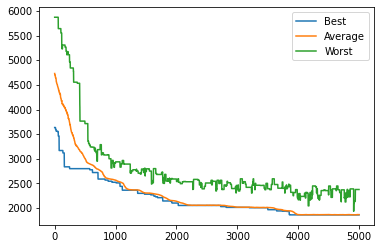

In [ ]:
#bayg29 default for comparison
plotting(*evolutionary_algorithm(bayg29_weights, 0.02, 500,  0.4, 3, 0.9, 5000, 29, matrix_dist))

In [ ]:
#bayg29 changing mutation
plotting(*evolutionary_algorithm(bayg29_weights, 0.2, 500,  0.4, 3, 0.9, 5000, 29, matrix_dist))

TypeError: ignored

Best Answer is: 1914


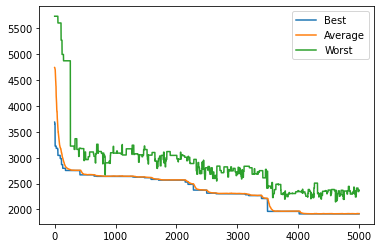

In [ ]:
#bayg29 changing tournament
plotting(*evolutionary_algorithm(bayg29_weights, 0.02, 500,  0.4, 20, 0.9, 5000, 29, matrix_dist))

Best Answer is: 2467


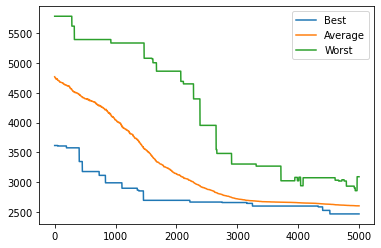

In [ ]:
#bayg29 changing tournament p combination
plotting(*evolutionary_algorithm(bayg29_weights, 0.02, 500,  0.4, 3, 0.5, 5000, 29, matrix_dist))

Best Answer is: 1781


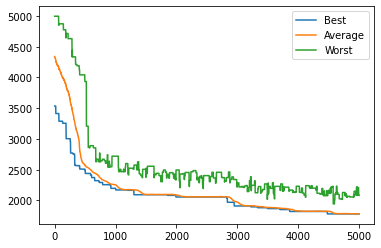

In [ ]:
#for ftv33
plotting(*evolutionary_algorithm(ftv33_weights, 0.02, 500,  0.4, 3, 0.9, 5000, 34, ftv_dist))